# Project: Investigate a Dataset (The No-show appointments dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### Analysis questions
1. Does Gender, Age, Scholarship Hypertension, Diabetes, Alcoholism, Handicapping or Receiving a SMS affects showing to the appointment
2. Does the the waiting time length affects showing to the appointment

## Setting-up the frame work

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import strftime

%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling

In [4]:
df = pd.read_csv('data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

The data appears to be consisted of 110527 rows & 14 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### No missing data
##### Drop columns that's not gonna be used in the data analysis process

In [7]:
df.drop(columns = ['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Scholarship     110527 non-null  int64 
 5   Hipertension    110527 non-null  int64 
 6   Diabetes        110527 non-null  int64 
 7   Alcoholism      110527 non-null  int64 
 8   Handcap         110527 non-null  int64 
 9   SMS_received    110527 non-null  int64 
 10  No-show         110527 non-null  object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


##### Rename the columns and remove typos

In [9]:
df.rename(columns={'Hipertension': 'HTN', 'Handcap': 'Handicap', 'SMS_received': 'SMS', 'No-show': 'NoShow'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Scholarship     110527 non-null  int64 
 5   HTN             110527 non-null  int64 
 6   Diabetes        110527 non-null  int64 
 7   Alcoholism      110527 non-null  int64 
 8   Handicap        110527 non-null  int64 
 9   SMS             110527 non-null  int64 
 10  NoShow          110527 non-null  object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


##### Change the data type of the columns with correct types

The yes and no question columns is changed to object

In [11]:
df['Scholarship'] = df['Scholarship'].astype('object')
df['HTN'] = df['HTN'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Handicap'] = df['Handicap'].astype('object')
df['SMS'] = df['SMS'].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Scholarship     110527 non-null  object
 5   HTN             110527 non-null  object
 6   Diabetes        110527 non-null  object
 7   Alcoholism      110527 non-null  object
 8   Handicap        110527 non-null  object
 9   SMS             110527 non-null  object
 10  NoShow          110527 non-null  object
dtypes: int64(1), object(10)
memory usage: 9.3+ MB


The date and time columns are changed to datetime format

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  object        
 5   HTN             110527 non-null  object        
 6   Diabetes        110527 non-null  object        
 7   Alcoholism      110527 non-null  object        
 8   Handicap        110527 non-null  object        
 9   SMS             110527 non-null  object        
 10  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 9.3+ MB


In [15]:
df.describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


The age has a -1 value which is not valid so we're gonna drop columns whith the age = -1

In [16]:
minusage = df.loc[df['Age'] == -1]
minusage

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,HTN,Diabetes,Alcoholism,Handicap,SMS,NoShow
99832,F,2016-06-06,2016-06-06,-1,0,0,0,0,0,0,No


In [17]:
df.drop(labels=99832, axis=0,inplace=True)

In [18]:
df.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


## Working with time

In [19]:
np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

### The scheduling day ranges from 10-11-2015 to 08-06-2016

In [20]:
np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

### The Appointment day ranges from 09-05-2016 to 08-06-2016

### Now We're gonna create The difference in date column between the scheduling day and the appointment day measured by days

In [21]:
df['time_def'] = df['AppointmentDay'] - df['ScheduledDay']
df['time_def'] = df['time_def'].dt.days

In [22]:
df.describe()

,Age,time_def
count,110526.000000,110526.000000
mean,37.089219,10.183794
std,23.110026,15.255034
min,0.000000,-6.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


#### There are negative values in the time difference which means that the appointment day was before the scheduling day so we're gonna drop those columns as they are not valid inputs

In [23]:
df[df.time_def < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,HTN,Diabetes,Alcoholism,Handicap,SMS,NoShow,time_def
27033,M,2016-05-10,2016-05-09,38,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,0,0,0,0,0,0,Yes,-1


In [24]:
df.drop(labels=[27033,55226,64175,71533,72362], inplace =True)

In [25]:
df.describe()

,Age,time_def
count,110521.000000,110521.000000
mean,37.089386,10.184345
std,23.109885,15.255153
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


### After cleaning the time_def column
### The average time difference is 10 days and ranges from 0 days to 179 days

### Unique values before analysis

In [26]:
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.HTN.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.Handicap.unique()))
print("Unique Values in `SMS` => {}".format(df.SMS.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMS` => [0 1]


<a id='eda'></a>
## Exploratory Data Analysis

## 1- Show/NoShow Descriptive analysis

In [27]:
df.groupby(['NoShow']).size()

NoShow
No     88207
Yes    22314
dtype: int64

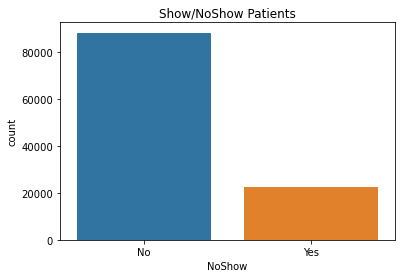

In [28]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

### we can see that out of 110,512 patients around 88,207 of them have turned up and 22314 didn't


## 2- Gender Analysis

In [29]:
df_female = df.loc[df['Gender'] == 'F']
df_male = df.loc[df['Gender'] == 'M']
df.groupby(['Gender', 'NoShow']).size()

Gender  NoShow
F       No        57245
        Yes       14591
M       No        30962
        Yes        7723
dtype: int64

In [30]:
female_noshow = df_female.groupby('NoShow').size()[1] / (df_female.groupby('NoShow').size()[1] + df_female.groupby('NoShow').size()[0])
print(female_noshow*100)

20.311542958962082


In [31]:
male_noshow = df_male.groupby('NoShow').size()[1] / (df_male.groupby('NoShow').size()[1] + df_male.groupby('NoShow').size()[0])
print(male_noshow*100)

19.9638102623756


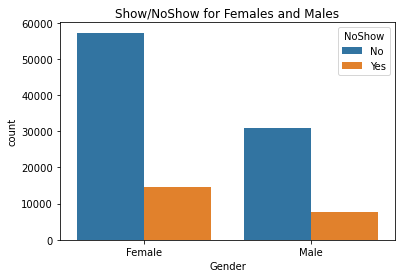

In [32]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

### The data shows that there are
#### 1- 71,836 females of which 57,245 showed and 14,591 didn't show (20%)
#### 2- 38,685 Males of which 30,962 showed and 7,723 didn't show (20%)
### It's not likely that gender affects showing up to the appointment

## 3 - Age Analysis

In [33]:
df.Age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

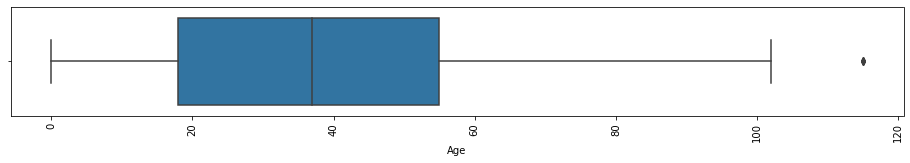

In [34]:
# Boxplot for the age
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.Age)

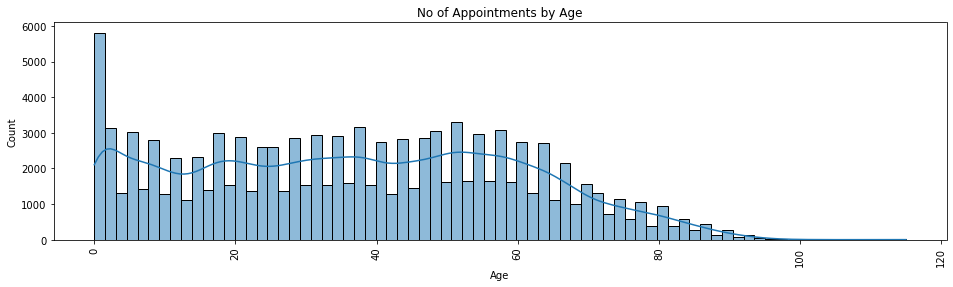

In [35]:
# Histogram for the age
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.histplot(x=df.Age,kde=True)
ax.set_title("No of Appointments by Age")
plt.show()

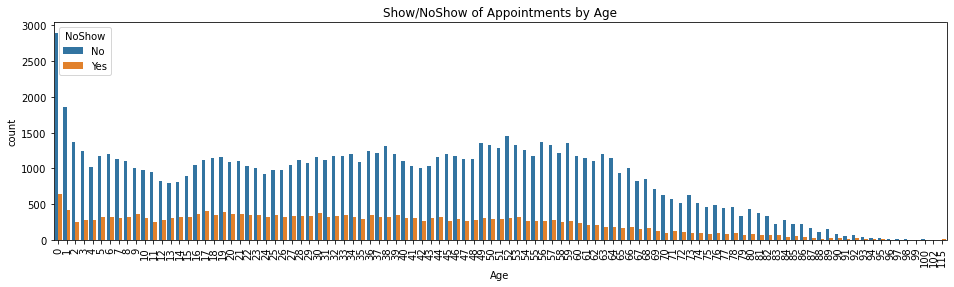

In [36]:
# Histogram for the age according to the parameter of shwoing or not showing
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.NoShow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

In [37]:
# calculating the ratios of the show and no show for every individual age
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()

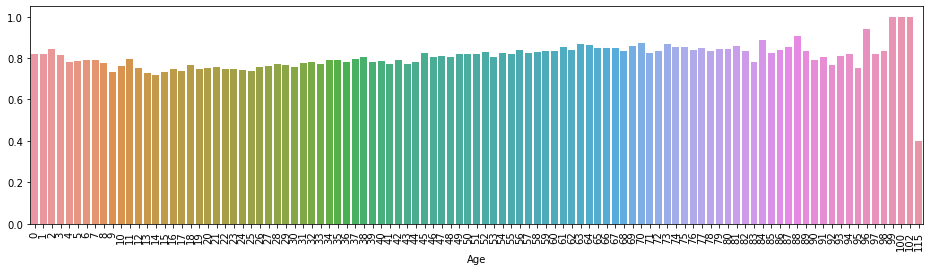

In [38]:
# Histogram of the ratios
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
plt.show()

## The age ranges from 0 to 115 years with an average of 37 years
### The ratio of show or no show corrected for age seems to be not significant

#### Analysis of other variables is similar so we're gonna make a function to make this easier

In [39]:
### Plotting function
def my_function(x1,hue1,data1,title,labels, xtitle):
    ax = sns.countplot(x=x1, hue=hue1, data=data1)
    ax.set_title(title)
    x_ticks_labels = labels
    plt.xlabel(xtitle)
    ax.set_xticklabels(x_ticks_labels)
    plt.show()


## 4- Scholarship Analysis

In [40]:
df.groupby(['Scholarship','NoShow']).size()

Scholarship  NoShow
0            No        79924
             Yes       19736
1            No         8283
             Yes        2578
dtype: int64

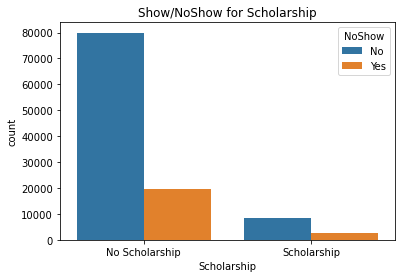

In [41]:
my_function(x1 = df.Scholarship,
            hue1= df.NoShow,
            data1= df,
            title= "Show/NoShow for Scholarship",
            labels= ['No Scholarship', 'Scholarship'],
            xtitle='Scholarship'
            )

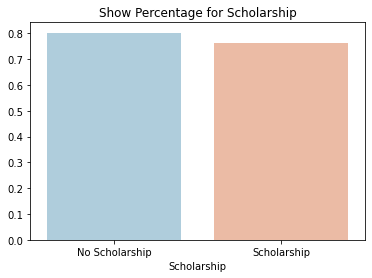

In [42]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit.
1. Out of the 10,500 patients with Scholarship around 75% of them have come for the visit.
2. So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

## 5- Hypertension Analysis

In [43]:
df.groupby(['HTN','NoShow']).size()

HTN  NoShow
0    No        70178
     Yes       18542
1    No        18029
     Yes        3772
dtype: int64

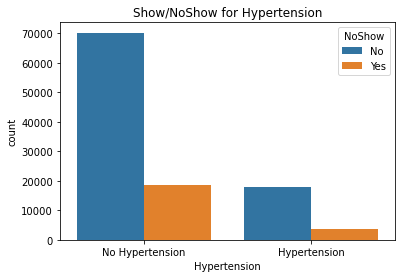

In [44]:
my_function(x1 = df.HTN,
            hue1= df.NoShow,
            data1= df,
            title= "Show/NoShow for Hypertension",
            labels= ['No Hypertension', 'Hypertension'],
            xtitle= 'Hypertension'
            )

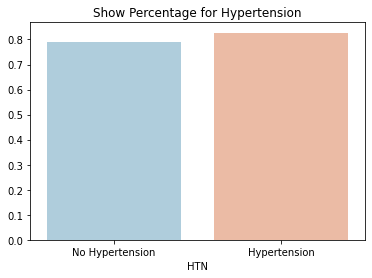

In [45]:
df_h_ratio = df[df.NoShow == 'No'].groupby(['HTN']).size()/df.groupby(['HTN']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 88,000 patients without Hypertension and out of them around 78% have come for the visit.
1. Out of the 22,500 patients with Hypertension around 85% of them have come for the visit.
2. So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

## 6- Diabetes Analysis

In [46]:
df.groupby(['Diabetes','NoShow']).size()

Diabetes  NoShow
0         No        81694
          Yes       20884
1         No         6513
          Yes        1430
dtype: int64

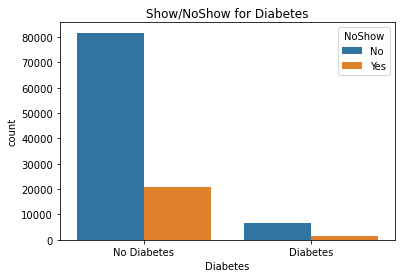

In [47]:
my_function(x1 = df.Diabetes,
            hue1= df.NoShow,
            data1= df,
            title= "Show/NoShow for Diabetes",
            labels= ['No Diabetes', 'Diabetes'],
            xtitle='Diabetes'
            )

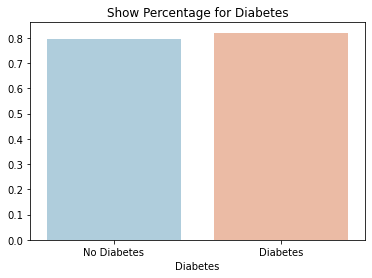

In [48]:
df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit.
1. Out of the 8,500 patients with Diabetes around 83% of them have come for the visit.
2. So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

## 7- Alcoholism Analysis

In [49]:
df.groupby(['Alcoholism','NoShow']).size()

Alcoholism  NoShow
0           No        85524
            Yes       21637
1           No         2683
            Yes         677
dtype: int64

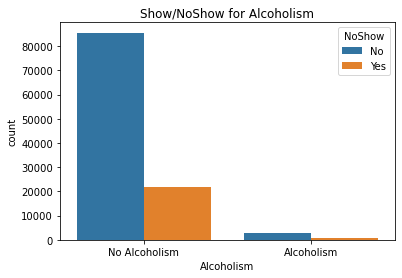

In [50]:
my_function(x1 = df.Alcoholism,
            hue1= df.NoShow,
            data1= df,
            title= "Show/NoShow for Alcoholism",
            labels= ['No Alcoholism', 'Alcoholism'],
            xtitle='Alcoholism'
            )

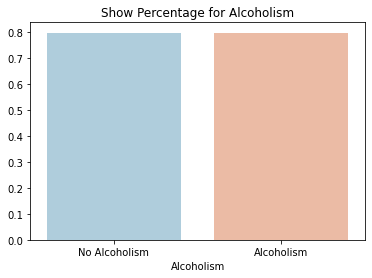

In [51]:
df_a_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

#### From the above visualization we can see that there are around 105,000 patients without Alcoholism and out of them around 80% have come for the visit.
1. Out of the 5,500 patients with Alcoholism around 80% of them have come for the visit.
2. As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.

## 8- Handicapping Analysis


In [52]:
df.groupby(['Handicap','NoShow']).size()

Handicap  NoShow
0         No        86373
          Yes       21909
1         No         1676
          Yes         364
2         No          146
          Yes          37
3         No           10
          Yes           3
4         No            2
          Yes           1
dtype: int64

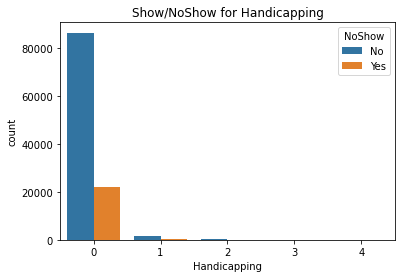

In [53]:
my_function(x1 = df.Handicap,
            hue1= df.NoShow,
            data1= df,
            title= "Show/NoShow for Handicapping",
            labels= ['0','1', '2', '3', '4'],
            xtitle='Handicapping'
            )

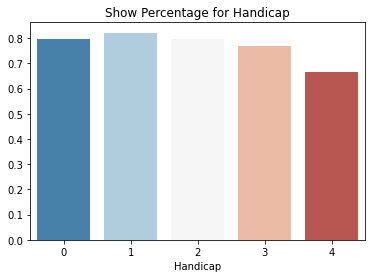

In [54]:
df_ha_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

#### From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.
As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

## 9- SMS Received Analysis

In [55]:
df.groupby(['SMS','NoShow']).size()

SMS  NoShow
0    No        62509
     Yes       12530
1    No        25698
     Yes        9784
dtype: int64

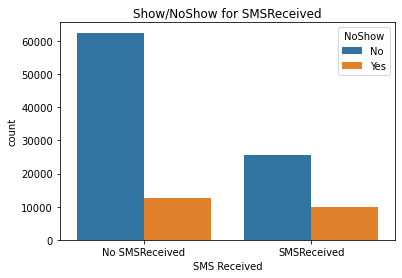

In [56]:
my_function(x1 = df.SMS,
            hue1= df.NoShow,
            data1= df,
            title= "Show/NoShow for SMSReceived",
            labels= ['No SMSReceived', 'SMSReceived'],
            xtitle='SMS Received'
            )

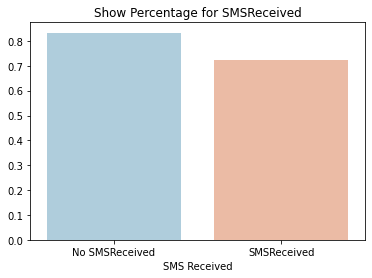

In [57]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['SMS']).size()/df.groupby(['SMS']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.xlabel('SMS Received')

plt.show()

#### From the above visualization we can see that there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.

## 10 - Time difference Analysis

In [58]:
df.groupby(['time_def','NoShow']).size()[0]

NoShow
No     36770
Yes     1792
dtype: int64

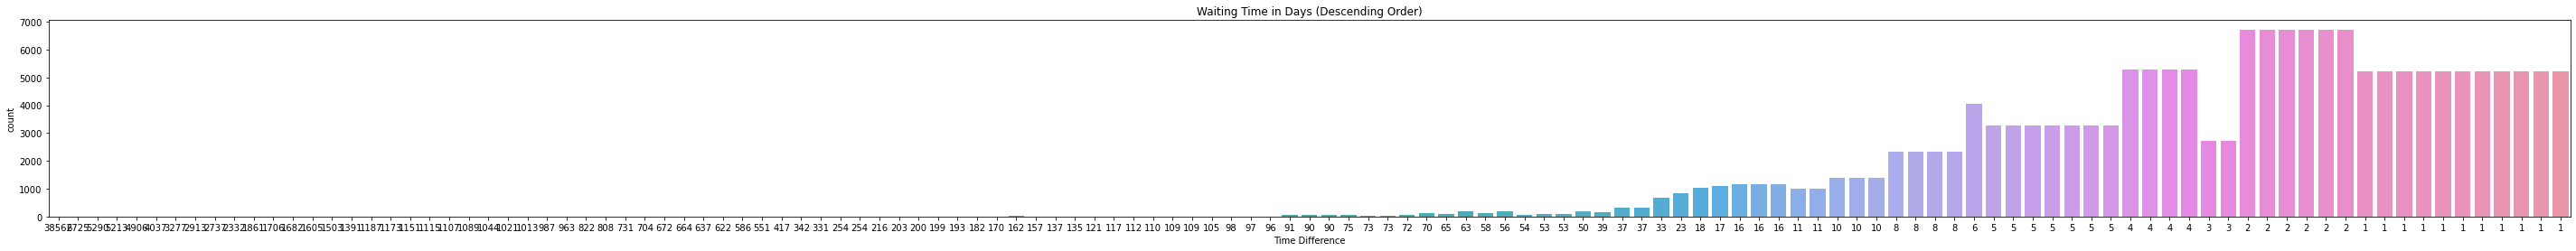

In [59]:
# Histogram for the waiting time in descending order
plt.figure(figsize=(50,4))
ax = sns.countplot(x=df.time_def, order=df.time_def.value_counts())
ax.set_title("Waiting Time in Days (Descending Order)")
plt.xlabel('Time Difference')
plt.show()

#### This shows that the days that has the most frequencies are mainly the first 50 values

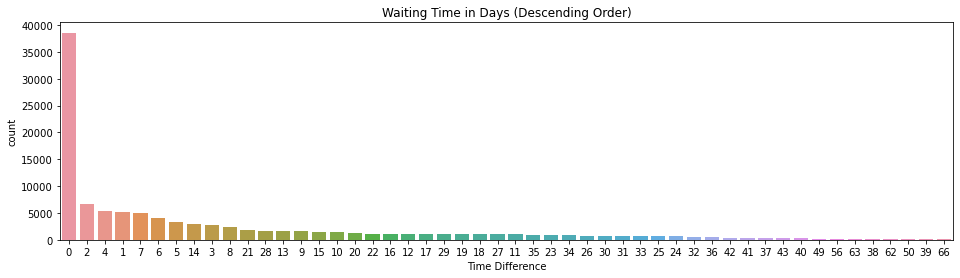

In [60]:
# Histogram for the waiting time in descending order for the first 50 values
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.time_def, order=df.time_def.value_counts().iloc[:50].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.xlabel('Time Difference')

plt.show()

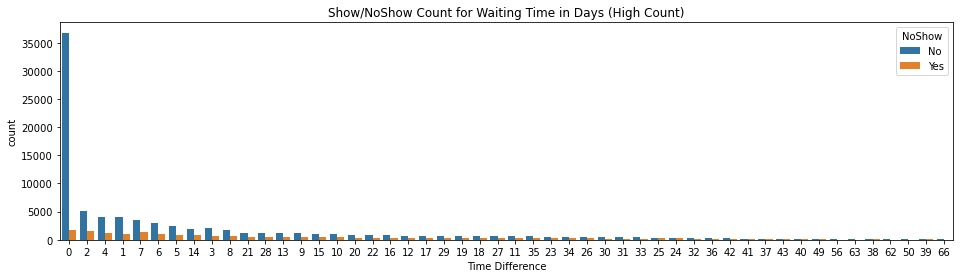

In [61]:
# Histogram for the waiting time in descending order for the first 50 values with the no show data

plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.time_def, hue=df.NoShow, order=df.time_def.value_counts().iloc[:50].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.xlabel('Time Difference')
plt.show()

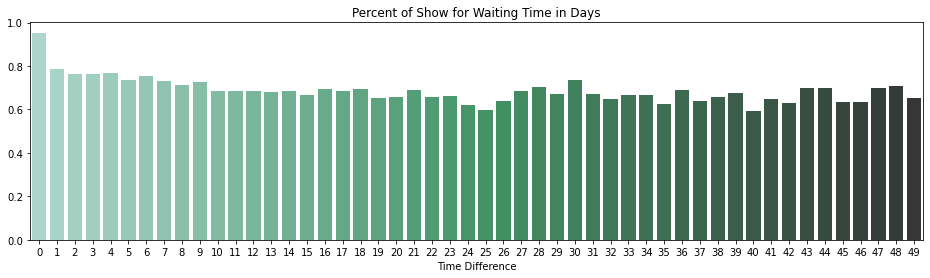

In [62]:
# Histogram for the ratios of showing to the appointed according to waiting days
df_w_ratio = df[df.NoShow == 'No'].groupby(['time_def']).size()/df.groupby(['time_def']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.time_def.iloc[:50].index, palette="BuGn_d")
plt.xlabel('Time Difference')
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

##### This shows that the patients that made the appointment in the same day had the highest percentage of showing to their appointments

##### Overall the the waiting time is not correlated to showing or not showing to the appointment

<a id='conclusions'></a>
## Conclusions

#### 1. Result showed that there are no significant factors that can predict showing to the appointment
#### 2. It will seem counterintuitive but receiving an SMS before the appointment showed more no-show , that can be helpful to revise the strategies used in the SMS
#### 3. More data will help in predicting showing or not showing so further data collection should be done
#####       Data about the certain demographics of the researched area maybe helpful
#####        Data about the weather of the certain day maybe helpful
#####        More data about the person making the appointment maybe helpful
